# IS709 Assignment 2

### Due: December 6, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_2.ipynb (e.g., “e123456_HW_2.ipynb”).
- Late submissions will be accepted by December 9, 2020 at 23:59 with a 5% per day penalty.
- Do not change variable names in the code blocks and the texts in the markdowns.
- Do not change the data.    
- You can add code blocks or markdown cells as many as you want.   
- **It is an individual assignment. You have to adhere to academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details. 
 
In this assignment, you will work on statistical hypothesis testing and try different statistical tests and comment on your findings.




**Import the libraries you need.**  

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import t
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import pylab
from math import sqrt
import seaborn as sns
import pingouin as pg
from pingouin import pairwise_ttests
%matplotlib inline

C:\Users\ozan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Hypothesis Testing

## Q1.
A botanist is curious about the productivity/efficiency of her newly developed hybrid tomato seed. Therefore, she recorded the amount of product (in kg) obtained from the seedlings that grew from hybrid seeds and regular seeds.

**Conduct the hypothesis testing to check whether there is a difference between the average obtained product of these two seeds by using a 0.05 significance level to evaluate the null and alternative hypotheses. Before doing hypothesis testing, check the related assumptions. Comment on the results.**

regular_seed=[24.88, 20.96, 19.97, 14.29, 18.89, 18.67, 19.46, 17.88, 19.57,
       18.31, 15.88, 22.26, 22.25, 24.65, 19.84, 18.52, 18.11, 15.21,
       22.54, 16.5 , 16.26, 19.1 , 24.  , 20.38, 16.73, 17.63, 21.51,
       19.23, 17.47]
       
hybrid_seed=[22.28, 25.3 , 29.12, 19.14, 21.05, 20.5 , 15.5 , 20.13, 19.82,
       26.48, 22.59, 17.96, 25.  , 21.89, 17.59, 21.15, 21.17, 20.29,
       23.09, 16.03, 22.16, 26.14, 25.64, 26.43, 26.47, 27.61, 19.53,
       25.62, 17.23, 21.13, 17.06, 26.24, 27.13, 22.38])


In [2]:
regular_seed=[24.88, 20.96, 19.97, 14.29, 18.89, 18.67, 19.46, 17.88, 19.57, 18.31, 15.88, 22.26, 22.25, 24.65, 19.84, 18.52, 18.11, 15.21, 22.54, 16.5 , 16.26, 19.1 , 24. , 20.38, 16.73, 17.63, 21.51, 19.23, 17.47]
hybrid_seed=[22.28, 25.3 , 29.12, 19.14, 21.05, 20.5 , 15.5 , 20.13, 19.82, 26.48, 22.59, 17.96, 25. , 21.89, 17.59, 21.15, 21.17, 20.29, 23.09, 16.03, 22.16, 26.14, 25.64, 26.43, 26.47, 27.61, 19.53, 25.62, 17.23, 21.13, 17.06, 26.24, 27.13, 22.38]

## Assumption Control

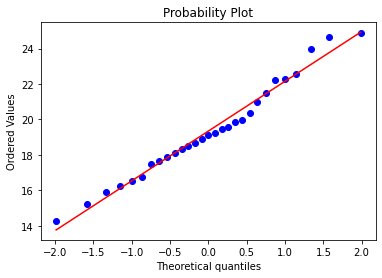

In [3]:
#qq plot
stats.probplot(regular_seed, dist="norm", plot=pylab)
pylab.show()

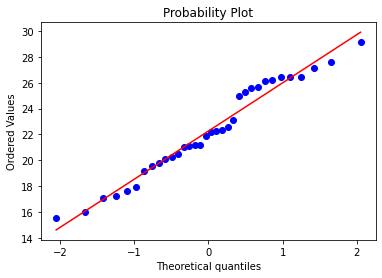

In [4]:
stats.probplot(hybrid_seed, dist="norm", plot=pylab)
pylab.show()

When we look at qq-plot to evaluate normality of two distributions, there is no significant evidence to say that these satisfies normality assumption. Therefore, we need to have more powerful test such as Shapiro-Wilks.

From now on, we have tested distributions related to current and another questions by using Shapiro-Wilks regarding normality assumption.

### Shapiro-Wilks Test

H0: There is no statistically significant difference between sample distribution and theoretical(normal) distribution

H1: There is statistically significant difference between sample distribution and theoretical(normal) distribution

In [5]:
shapiro(regular_seed)

ShapiroResult(statistic=0.9750723838806152, pvalue=0.7027644515037537)

In [6]:
print("T Calculated Statistic: " + str(shapiro(regular_seed)[0]))
print("P-value: " + str(shapiro(regular_seed)[1]))

T Calculated Statistic: 0.9750723838806152
P-value: 0.7027644515037537


Since p-value (0.7027644515037537) is greater than alpha(0.05), we can say that Ho fails to reject.Therefore, normality assumption is valid for regular_seed.

In [7]:
shapiro(hybrid_seed)

ShapiroResult(statistic=0.9619008302688599, pvalue=0.27601149678230286)

In [8]:
print("T Calculated Statistic " + str(shapiro(hybrid_seed)[0]))
print("P-value: " + str(shapiro(hybrid_seed)[1]))

T Calculated Statistic 0.9619008302688599
P-value: 0.27601149678230286


Since p-value (0.27601149678230286) is greater than alpha(0.05), we can say that Ho fails to reject.Therefore, normality assumption is valid for hybrid_seed.

Due to validation of normality assumption, parametric statistical tests can be used.

# Hypothesis Testing

H0: 𝜇1=𝜇2 (the means of regular seed and hybrid seed are equal)

H1: 𝜇1≠𝜇2 (the means of regular seed and hybrid seed are unequal)


Since we have two different groups(unpaired) with continuous endpoint and we have investigated difference between the average obtained product of these two seeds by using a 0.05 significance level (alpha), Independent Two Samples T-Test can be used for Hypothesis testing regarding parametric statistical tests.

In [9]:
#Testing hypothesis with Python built-in function

In [10]:
stats.ttest_ind(a=regular_seed, b=hybrid_seed)

Ttest_indResult(statistic=-3.5381790855069073, pvalue=0.0007771046298238749)

In [11]:
test_statistic, pvalue = stats.ttest_ind(regular_seed, hybrid_seed)
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistics = -3.5382, p-value = 0.0008


In [12]:
len(regular_seed)

29

In [13]:
len(hybrid_seed)

34

**p-value:**

Since p-value (0.0008) is less than alpha(0.05), we can conclude that Ho rejects that means there is statistically significant difference between means of regular and hybrid seeds.

**Test statistics:**

alpha=0.05 and we have two-sided hypothesis(𝜇1≠𝜇2), so table score can be calculated by using 

alpha/2=0.025 and df=n1+n2-2 where n1=29 (number of observations in regular seed) and n2=34 (number of observations in hybrid seed)

table score of t = +/-1.9996 where alpha/2=0.025 and df=61

Since Test Statistics(-3.5382) is less than critical value-table score(-1.9996), we can conclude that Ho rejects that means there is statistically significant difference between means of regular and hybrid seeds.

Comment via test statistics is compatible with comment via p-value.

In [14]:
#Testing hypothesis with T-test from Scratch

alpha=0.05 and we have two-sided hypothesis(𝜇1≠𝜇2), so table score can be calculated by using 

alpha/2=0.025 and df=n1+n2-2 where n1=29 (number of observations in regular seed) and n2=34 (number of observations in hybrid seed)

table score of t = +/-1.9996 where alpha/2=0.025 and df=61

In [15]:
def independent_ttest(data1, data2, alpha):

    mean1, mean2 = np.mean(data1), np.mean(data2)
    std1, std2 = np.std(data1), np.std(data2)
# calculate sp (pooled standard deviation)
    sp = sqrt((((len(data1)-1)*(std1**2.0)+(len(data2)-1)*(std2**2.0))/ (len(data1)+len(data2)-2)))
    num = sqrt(1/len(data1) + 1/len(data2))
    num1 = sp*num
# calculate the t statistic
    t_stat = (mean1 - mean2)/num1
# degrees of freedom
    df = len(data1) + len(data2) - 2
# calculate the critical value
    cv = t.ppf(1.0 - (alpha/2), df)
# calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
    return t_stat, df, cv, p
 
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(regular_seed, hybrid_seed, alpha)
print('t=%.4f, df=%d, cv=%.4f, p=%.4f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Fail To reject null hypothesis that the means are equal by using test statistics.')
else:
	print('Reject the null hypothesis that the means are equal by using test statistics.')
if p > alpha:
	print('Accept null hypothesis that the means are equal by using p-value.')
else:
	print('Reject the null hypothesis that the means are equal by using p-value.')

t=-3.5944, df=61, cv=1.9996, p=0.0007
Reject the null hypothesis that the means are equal by using test statistics.
Reject the null hypothesis that the means are equal by using p-value.


Since t-statistics(-3.5944) is less than -critical value(-1.9996), Ho is rejected that means there is statistically significant difference between means of regular and hybrid seeds.

This result is compatible with testing hypothesis with p-value using python function for T-test

Results of different methods (test for python function and scratch) to evaluate hypothesis are slightly different such that test statistics=-3.5382 for pyhthon fuction and test statistics=-3.5944 from scratch.However, this does not lead to interpret hypothesis testing differently because differences are very little and their p values are almost zero that means Ho is rejected.

## Q2.

Fifteen students were diagnosed with iron deficiency anemia by the METU Health Center in the previous semester. Healthcare personnel told these patients about the dangers of anemia and prescribed an iron supply. The patients came for control two months later, and their iron levels were reexamined.

**According to this information, conduct the hypothesis testing to check whether there is a increase in the iron levels of the patients after the iron supply by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results.**

test_results_before_supply=[12.68, 10.65, 10.14,  7.2 ,  9.58,  9.46,  9.87,  9.05,  9.93, 9.28,  8.02, 11.32, 11.32, 12.56, 10.07]  
test_results_after_supply=[12.55, 12.4 , 11.29, 14.08, 11.78, 11.69, 12.77, 14.63, 13.26, 11.87, 12.21, 13.68, 12.82, 12.15, 12.74]

In [16]:
test_results_before_supply=[12.68, 10.65, 10.14, 7.2 , 9.58, 9.46, 9.87, 9.05, 9.93, 9.28, 8.02, 11.32, 11.32, 12.56, 10.07]
test_results_after_supply=[12.55, 12.4 , 11.29, 14.08, 11.78, 11.69, 12.77, 14.63, 13.26, 11.87, 12.21, 13.68, 12.82, 12.15, 12.74]

## Assumption Control

### Shapiro-Wilks Test

H0: There is no statistically significant difference between sample distribution and theoretical(normal) distribution

H1: There is statistically significant difference between sample distribution and theoretical(normal) distribution

In [17]:
shapiro(test_results_before_supply)

ShapiroResult(statistic=0.9651115536689758, pvalue=0.7802568674087524)

In [18]:
print("T Calculated Statistic: " + str(shapiro(test_results_before_supply)[0]))
print("P-value: " + str(shapiro(test_results_before_supply)[1]))

T Calculated Statistic: 0.9651115536689758
P-value: 0.7802568674087524


Since p-value (0.7802568674087524) is greater than alpha(0.05), we can say that Ho fails to reject.Therefore, normality assumption is valid for test_results_before_supply.

In [19]:
shapiro(test_results_after_supply)

ShapiroResult(statistic=0.9553298354148865, pvalue=0.6118934154510498)

In [20]:
print("T Calculated Statistic: " + str(shapiro(test_results_after_supply)[0]))
print("P-value: " + str(shapiro(test_results_after_supply)[1]))

T Calculated Statistic: 0.9553298354148865
P-value: 0.6118934154510498


Since p-value (0.6118934154510498) is greater than alpha(0.05), we can say that Ho fails to reject.Therefore, normality assumption is valid for test_results_after_supply.

Due to validation of normality assumption, parametric statistical tests can be used.

# Hypothesis Testing

H0: 𝜇1=𝜇2 (the means of iron-levels of patients are equal after iron supply)

H1: 𝜇1<𝜇2 (the means of iron level of patients after iron supply is greater than  mean of iron level of patients before iron supply)


Since we have one group (paired) with continuous endpoint and we have investigated effects of iron supply to same people within group. Therefore, Dependent Two Samples T-Test can be used for Hypothesis testing regarding parametric statistical tests.Also, We will check whether there is a increase in the iron levels of the patients after the iron supply, alternative hypothesis(H1) is generated like 𝜇1<𝜇2.

In [21]:
#Testing hypothesis with Python built-in function

In [22]:
stats.ttest_rel(a=test_results_before_supply, b=test_results_after_supply)

Ttest_relResult(statistic=-5.234470546314352, pvalue=0.0001263744085492977)

In [23]:
test_statistic, pvalue = stats.ttest_rel(test_results_before_supply, test_results_after_supply)
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistics = -5.2345, p-value = 0.0001


**p-value:**

Since p-value (0.0001) is less than alpha(0.05), we can conclude that Ho rejects that means there is statistically significant difference between means of iron levels of patients after iron supply.

As you can see from box-plot below, iron supply increases iron levels of patients.

In [24]:
len(test_results_before_supply)

15

In [25]:
len(test_results_after_supply)

15

**Test statistics:**

alpha=0.05 and we have one-sided hypothesis (𝜇1<𝜇2), so table score can be calculated by using 

alpha=0.05 and df=n-1 (number of people are equal) where n=15 (number of patients)

table score of t = 1.7613 where alpha=0.05 and df=14

Since Test Statistics(-5.2345) is less than critical value-table score(-1.7613), we can conclude that Ho rejects that means there is statistically significant difference between means of iron levels of patients after iron supply.

Comment via test statistics is compatible with comment via p-value.

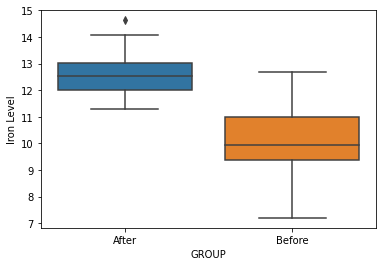

In [26]:
B = pd.DataFrame(test_results_before_supply)
A = pd.DataFrame(test_results_after_supply)

#After
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "After"
A = pd.concat([A, GROUP_A], axis = 1)

#Before
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "Before"
B = pd.concat([B, GROUP_B], axis = 1)

#All data including Before and After
AB = pd.concat([A,B])
AB.columns = ["Iron Level","GROUP"]

sns.boxplot(x = "GROUP", y = "Iron Level", data = AB);

In [27]:
#Testing hypothesis with T-test from Scratch

alpha=0.05 and we have one-sided hypothesis (𝜇1<𝜇2), so table score can be calculated by using 

alpha=0.05 and df=n-1 (number of people are equal) where n=15 (number of patients)

table score of t = 1.7613 where alpha=0.05 and df=14

In [28]:
# t-test for dependent samples
def dependent_ttest(data1, data2, alpha):

    mean1, mean2 = np.mean(data1), np.mean(data2)
    n = len(data1)
# sum squared difference between observations
    d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
# sum difference between observations
    d2 = sum([data1[i]-data2[i] for i in range(n)])
# standard deviation of the difference between means
    sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
# standard error of the difference between the means
    sed = sd / sqrt(n)
# the t statistic
    t_stat = (mean1 - mean2) / sed
# degrees of freedom
    df = n - 1
# critical value
    cv = t.ppf(1.0 - alpha, df)
# p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, df, cv, p

# the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(test_results_before_supply, test_results_after_supply, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
if abs(t_stat) <= cv:
	print('Fail To reject null hypothesis that the means are equal by using test statistics.')
else:
	print('Reject the null hypothesis that the means are equal by using test statistics.')
if p > alpha:
	print('Accept null hypothesis that the means are equal by using p-value.')
else:
	print('Reject the null hypothesis that the means are equal by using p-value.')

t=-5.234, df=14, cv=1.761, p=0.000
Reject the null hypothesis that the means are equal by using test statistics.
Reject the null hypothesis that the means are equal by using p-value.


Since t-statistics(-5.234) is less than -critical value(-1.761), Ho is rejected that means there is statistically significant difference between iron levels of patients after iron supply.

This result is compatible with testing hypothesis with p-value using python function for T-test and test statistics and p values are equal (-5.234) and (0.000) regarding python built-in function and scratch.

## Q3. 

A pediatrician wants to see the effect of formula consumption on the average monthly weight gain (in gr) of babies. For this reason, she collected  data from three different groups. The first group is exclusively breastfed children(receives only breast milk), the second group is children who are fed with only formula and the last group is both formula and breastfed children. These data as below 


only_breast=[794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7,
       717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]      
   
only_formula=[ 898.8,  881.2,  940.2,  966.2,  957.5, 1061.7, 1046.2,  980.4,
        895.6,  919.7, 1074.1,  952.5,  796.3,  859.6,  871.1 , 1047.5,
        919.1 , 1160.5,  996.9]     
        
both=[976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6,
       805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 ,
       823.6, 818.7, 926.8, 791.7, 948.3]  
**According to this information, conduct the hypothesis testing to check whether there is a difference between the average monthly gain of these three groups by using a 0.05 significance level. If there is a significant difference, perform further analysis to find that caused the difference.  Before doing hypothesis testing, check the related assumptions. Comment on the results.**


In [29]:
only_breast=[794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
only_formula=[ 898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]
both=[976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]

## Assumption Control

### Shapiro-Wilks Test

H0: There is no statistically significant difference between sample distribution and theoretical(normal) distribution

H1: There is statistically significant difference between sample distribution and theoretical(normal) distribution

In [30]:
shapiro(only_breast)

ShapiroResult(statistic=0.9508076906204224, pvalue=0.4694197475910187)

In [31]:
print("T Calculated Statistic: " + str(shapiro(only_breast)[0]))
print("P-value: " + str(shapiro(only_breast)[1]))

T Calculated Statistic: 0.9508076906204224
P-value: 0.4694197475910187


In [32]:
shapiro(only_formula)

ShapiroResult(statistic=0.976082980632782, pvalue=0.8879066705703735)

In [33]:
print("T Calculated Statistic: " + str(shapiro(only_formula)[0]))
print("P-value: " + str(shapiro(only_formula)[1]))

T Calculated Statistic: 0.976082980632782
P-value: 0.8879066705703735


In [34]:
shapiro(both)

ShapiroResult(statistic=0.974605917930603, pvalue=0.7972880005836487)

In [35]:
print("T Calculated Statistic: " + str(shapiro(both)[0]))
print("P-value: " + str(shapiro(both)[1]))

T Calculated Statistic: 0.974605917930603
P-value: 0.7972880005836487


Since all p-values are greater than alpha(0.05), we can say that Ho fails to reject.Therefore, normality assumption is valid for all.

Due to validation of normality assumption, parametric statistical tests can be used.

# Hypothesis Testing

H0: 𝜇1=𝜇2=𝜇3 (the means of monthly gain of these three groups are equal)

H1: At least one of the means is different from the others


Since we have more than two unrelated groups with continuous endpoint and we have investigated effects of formula regarding montly gain of weights. Therefore, Analysis of Variation(ANOVA) can be used for Hypothesis testing regarding parametric statistical tests.Also, since only one independent variable(gain) exists, One-Way ANOVA can be implemented.However, one-way ANOVA won't tell us what groups were different.If our test returns a significant f-statistic, we may need to run post hoc test (like the Least Significant Difference Test) to tell us exactly which group had a difference in means.

In [36]:
#Testing hypothesis with Python built-in function

In [37]:
alpha=0.05
fscore, pvalue = stats.f_oneway(only_breast, only_formula, both)

print("f-score = {}, p-value = {}".format(fscore, pvalue))

if pvalue<alpha:
    print("Reject the null hypothesis!\nTheir means are not the same.")
else:
    print("Failed to reject the null hypothesis!")

f-score = 26.701251857537958, p-value = 7.18623550288582e-09
Reject the null hypothesis!
Their means are not the same.


**p-value:**

Since p-value (7.18623550288582e-09) is less than alpha(0.05), we can conclude that Ho rejects that means there is statistically significant difference between at least one of the means of monthly gain of babies.

In [38]:
len(only_breast)

17

In [39]:
len(only_formula)

19

In [40]:
len(both)

23

In [41]:
len(only_breast)+len(only_formula)+len(both)

59

**Test statistics:**

alpha=0.05 and we have ANOVA, so table score can be calculated by using 

alpha=0.05 and dfn=3-1=2(degrees of freedom of numarator-variance between) where 3:number of different groups, dfd=59-3=56(degrees of freedom of denumarator-variance within) where 59:number of all observations and 3:Number of groups

table score of F = 3.16186116 where alpha=0.05, dfn=2 and dfd=56

Since Test Statistics(26.7013) is greater than critical value-table score(3.1619), we can conclude that Ho rejects that means there is statistically significant difference between at least one of the means of monthly gain of babies.

Comment via test statistics is compatible with comment via p-value.

One-way ANOVA won't tell us what groups were different.If our test returns a significant f-statistic, we may need to run post hoc test(like the Least Significant Difference Test) to tell us exactly which group had a difference in means.

According to Bonferroni (bonf) test applied below,The p-corr column shows the corrected p-value. For example, between Only Breast and Only Formula the corrected p-value is 4.702207e-07. This is below the alpha(0.05) which is the threshold. Below this is considered 'significant' so we can conclude that the mean score of the Only Breast on 'Gain' is significantly different than "Only Formula". The same applies between "Only Formula" and "Both", but not for "Only Breast" and "Both" since p-corr of Only Breast-Both is 0.1294573 which is greater than 0.05.

To conclude, "Only Formula" is significantly different than "Only Breast" and "Both".However, "Only Breast" and "Both" are not significantly different from each other.

In [42]:
#To use Post Test and Box-Plot
Br = pd.DataFrame(only_breast)
F = pd.DataFrame(only_formula)
Bo = pd.DataFrame(both)
#Only Breast
GROUP_A = np.arange(len(Br))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "Only Breast"
A = pd.concat([Br, GROUP_A], axis = 1)

#Only Formula
GROUP_B = np.arange(len(F))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "Only Formula"
B = pd.concat([F, GROUP_B], axis = 1)

#Both
GROUP_C = np.arange(len(Bo))
GROUP_C = pd.DataFrame(GROUP_C)
GROUP_C[:] = "Both"
C = pd.concat([Bo, GROUP_C], axis = 1)

#ALL DATA with all groups
ABC = pd.concat([A,B,C])
ABC.columns = ["Gain","GROUP"]

In [43]:
posthocs = pairwise_ttests(dv='Gain', between='GROUP', padjust='bonf', data=ABC, correction=False)
posthocs

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,GROUP,Only Breast,Only Formula,False,True,-6.573054,34.0,two-sided,1.567402e-07,4.702207e-07,bonf,6.58e+04,-2.145642
1,GROUP,Only Breast,Both,False,True,-2.092227,38.0,two-sided,4.315143e-02,1.294543e-01,bonf,1.68,-0.655896
2,GROUP,Only Formula,Both,False,True,5.720115,40.0,two-sided,1.169247e-06,3.507742e-06,bonf,1.096e+04,1.739867


To be able to support knowledge about difference, the visualization like box-plot can help. By looking at boxplot below,"formula" provides the babies to more gain compared to "only breast"."both breast and formula" is located between "only breast" and "only formula" regarding means of gain.

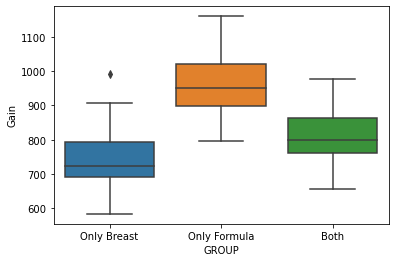

In [44]:
sns.boxplot(x = "GROUP", y = "Gain", data = ABC);

In [45]:
#Testing hypothesis with F-test from Scratch

alpha=0.05 and we have ANOVA, so table score can be calculated by using 

alpha=0.05 and dfn=3-1=2(degrees of freedom of numarator-variance between) where 3:number of different groups, dfd=59-3=56(degrees of freedom of denumarator-variance within) where 59:number of all observations and 3:Number of groups

table score of F = 3.16186116 where alpha=0.05, dfn=2 and dfd=56

In [46]:
only_breast=[794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
only_formula=[ 898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]
both=[976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]
def sumcalculation(data):
    flag = 0
    for i in range(len(data)):
        flag = flag + (np.mean(data)-data[i])**2
    return flag

var_within_only_breast = sumcalculation(only_breast)
var_within_only_formula = sumcalculation(only_formula)
var_within_both = sumcalculation(both)

sum_observations = len(only_breast)+len(only_formula)+len(both)
corr_sum_observations = sum_observations-3
sum_variations_days = var_within_only_breast+var_within_only_formula+var_within_both
variation_within = sum_variations_days/corr_sum_observations

grand_mean = (np.mean(only_breast)+np.mean(only_formula)+np.mean(both))/3

variance_between = ((len(only_breast)*(np.mean(only_breast)-grand_mean)**2)+(len(only_formula)*(np.mean(only_formula)-grand_mean)**2)+(len(both)*(np.mean(both)-grand_mean)**2))/2
F_score = variance_between/variation_within
critival_value_F = stats.f.ppf(q=1-.05, dfn=2, dfd=56)
print(F_score)
print(critival_value_F)
if abs(F_score) <= critival_value_F:
	print('Fail To reject null hypothesis that the means are equal by using test statistics.')
else:
	print('Reject the null hypothesis that the means are equal by using test statistics.')

26.70515577622895
3.161861164913022
Reject the null hypothesis that the means are equal by using test statistics.


Since F-score(26.70515577622895) is greater than critical value (3.161861164913022), we can conclude that Ho rejects that means there is statistically significant difference between at least one of the means of monthly gain of babies.

This result is compatible with testing hypothesis with python built-in function for F-test and test statistics (26.701251857537958 and 26.70515577622895) are equal.

# Q4.

A medical company wants to test whether its new glucose meter kit is measuring correctly. For this reason, an experiment was organized and blood samples were taken from 12 participants. By using these samples, glucose levels of participants were measured with thr both newly developed glucose meter kit and standard lab methods.

standard_lab_method=[102.4, 123.7, 106.2, 149.2, 158.1, 159.3, 150.7, 151. , 140.8, 143.3, 112.7,  99.5, 158.8]    
new_meter=[105.2,  110.1, 120. , 142.2, 160.4, 138. ,  147.7, 137.8, 153.5, 160.8,  90.4, 104.6, 170. ]

**According to this information, conduct hypothesis testing to check whether there is a difference between measurements of two methods by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results.**

In [47]:
standard_lab_method=[102.4, 123.7, 106.2, 149.2, 158.1, 159.3, 150.7, 151. , 140.8, 143.3, 112.7, 99.5, 158.8]
new_meter=[105.2, 110.1, 120. , 142.2, 160.4, 138. , 147.7, 137.8, 153.5, 160.8, 90.4, 104.6, 170.]

## Assumption Control

### Shapiro-Wilks Test

H0: There is no statistically significant difference between sample distribution and theoretical(normal) distribution

H1: There is statistically significant difference between sample distribution and theoretical(normal) distribution

In [48]:
shapiro(standard_lab_method)

ShapiroResult(statistic=0.8557056784629822, pvalue=0.03382979705929756)

In [49]:
print("T Calculated Statistic: " + str(shapiro(standard_lab_method)[0]))
print("P-value: " + str(shapiro(standard_lab_method)[1]))

T Calculated Statistic: 0.8557056784629822
P-value: 0.03382979705929756


Since p-value is less than alpha(0.05), we can conclude that H0 is rejected that means sample does not approximate normal distribution. Normality assumption is not valid for standard_method.

In [50]:
shapiro(new_meter)

ShapiroResult(statistic=0.9412077069282532, pvalue=0.472730427980423)

In [51]:
print("T Calculated Statistic: " + str(shapiro(new_meter)[0]))
print("P-value: " + str(shapiro(new_meter)[1]))

T Calculated Statistic: 0.9412077069282532
P-value: 0.472730427980423


Since p-value is greater than alpha(0.05), we can conclude that H0 fails to reject that means the sample approximates normal distibution. Normality assumption is valid for "new_meter".

Since one of the sample does not distributed normally, non-parametric tests should be used.

# Hypothesis Testing

H0: 𝜇1=𝜇2 (the means of glucose level are equal regarding different methods)

H1: 𝜇1≠𝜇2 (the means of glucose level are not equal regarding different methods)


Since we have one group (two samples-paired) with continuous endpoint and we have investigated effects of new methods to measure correctly with that group.In addition to that, non-parametric statistical test should be used due to normality assumption.
Therefore, Wilcoxon Signed Rank Test can be used for Hypothesis testing.Also, We will check whether there is a difference between measurements of two methods.

In [52]:
#Testing hypothesis with Python built-in function

In [53]:
stats.wilcoxon(standard_lab_method, new_meter)

WilcoxonResult(statistic=41.0, pvalue=0.786865234375)

In [54]:
test_statistic, pvalue = stats.wilcoxon(standard_lab_method, new_meter)

print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistic = 41.0000, p-value = 0.7869


In [55]:
len(standard_lab_method)

13

In [56]:
len(new_meter)

13

**p-value:**

Since p-value(0.7869) is greater than alpha(0.05), we can conclude that H0 fails to reject and there is no significant evidence that two methods measure differently.

**Test statistics:**

alpha=0.05 and we have two-sided hypothesis (𝜇1≠𝜇2), so table score can be calculated by using 

table score of W = 17

Since Test Statistics(41) is greater than critical value-table score(17), we can conclude that Ho fails to reject and there is no significant evidence that two methods measure differently.

**Reference:**https://www.socscistatistics.com/tests/signedranks/default2.aspx and https://www.real-statistics.com/statistics-tables/wilcoxon-signed-ranks-table/

Comment via test statistics is compatible with comment via p-value.

As we can see from box-plot below, the methods measures glucose levels nearly equal.

In [57]:
Br = pd.DataFrame(standard_lab_method)
F = pd.DataFrame(new_meter)

GROUP_A = np.arange(len(Br))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "standard_lab_method"
A = pd.concat([Br, GROUP_A], axis = 1)

GROUP_B = np.arange(len(F))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "new_meter"
B = pd.concat([F, GROUP_B], axis = 1)

#ALL DATA with all groups
AB = pd.concat([A,B])
AB.columns = ["Glucose Level","GROUP"]

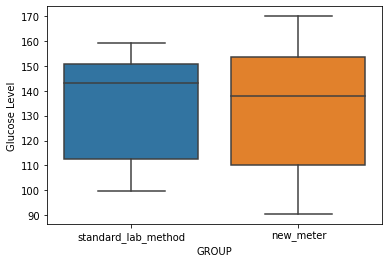

In [58]:
sns.boxplot(x = "GROUP", y = "Glucose Level", data = AB);

# Q5.
A newly graduate of Computer Science is interested in the entry-level data analyst position salaries of defense industry firms and game firms. To investigate whether there is a difference between them, she selected 13 job advertisements from Linkedin, Glassdoor, and Monster Jobs randomly in each of the two industries and records their annual salaries (in K USD).The data as below.

game=[80., 72., 70., 58., 68., 67., 69., 66., 69., 67., 62., 75., 95.]    
defense=[72., 79., 73., 76., 74., 78., 74., 72., 76., 79., 73., 72., 94.]

**According to this information, conduct the hypothesis testing to check whether there is a difference between the average salary of entry-level data analyst salary in these two industries by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results.**

In [59]:
game=[80., 72., 70., 58., 68., 67., 69., 66., 69., 67., 62., 75., 95.]
defense=[72., 79., 73., 76., 74., 78., 74., 72., 76., 79., 73., 72., 94.]

## Assumption Control

### Shapiro-Wilks Test

H0: There is no statistically significant difference between sample distribution and theoretical(normal) distribution

H1: There is statistically significant difference between sample distribution and theoretical(normal) distribution

In [60]:
shapiro(game)

ShapiroResult(statistic=0.8562496304512024, pvalue=0.03438952937722206)

In [61]:
print("T Calculated Statistic: " + str(shapiro(game)[0]))
print("P-value: " + str(shapiro(game)[1]))

T Calculated Statistic: 0.8562496304512024
P-value: 0.03438952937722206


Since p-value is less than alpha(0.05), we can conclude that H0 rejects that means sample does not approximate normal distribution. Normality assumption is not valid for "game".

In [62]:
shapiro(defense)

ShapiroResult(statistic=0.6978541612625122, pvalue=0.000528195989318192)

In [63]:
print("T Calculated Statistic: " + str(shapiro(defense)[0]))
print("P-value: " + str(shapiro(defense)[1]))

T Calculated Statistic: 0.6978541612625122
P-value: 0.000528195989318192


Since p-value is less than alpha(0.05), we can conclude that H0 rejects that means the sample does not approximate normal distribution. Normality assumption is not valid for "defense".

Since both samples does not approximate normal distribution, non-parametric tests should be used.

# Hypothesis Testing

H0: 𝜇1=𝜇2 (the means of salaries are equal regarding two industries)

H1: 𝜇1≠𝜇2 (the means of salaries are not equal regarding two industries)


Since we have two different groups (two samples-unpaired) with continuous endpoint and we have investigated salaries in two industries.In addition to that, non-parametric statistical test should be used due to normality assumption.
Therefore, Mann Whitney U Test can be used for Hypothesis testing.Also, We will check whether there is a difference between salaries of two industries.

In [64]:
#Testing hypothesis with Python built-in function

In [65]:
stats.mannwhitneyu(x=game, y=defense)

MannwhitneyuResult(statistic=33.5, pvalue=0.004704070006313247)

In [66]:
test_statistic, pvalue = stats.mannwhitneyu(game, defense)

print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistic = 33.5000, p-value = 0.0047


In [67]:
len(game)

13

In [69]:
len(defense)

13

**p-value:**

Since p-value(0.0047) is less than alpha(0.05), we can conclude that H0 rejects and there is significant evidence that two industries have different means of salaries.

**Test statistics:**

alpha=0.05 and we have two-sided hypothesis (𝜇1≠𝜇2), so table score can be calculated by using 

table score of U = 45

Since Test Statistics(33.5) is less than critical value-table score(45), we can conclude that Ho rejects and there is significant evidence that two industries have different means of salaries.

**Reference:**https://www.socscistatistics.com/tests/mannwhitney/default3.aspx and https://www.real-statistics.com/statistics-tables/mann-whitney-table/

Comment via test statistics is compatible with comment via p-value.

As we can see from box-plot below, salaries are located in higher position in Defense industry compared to Game industry.

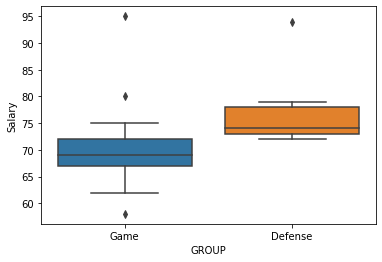

In [68]:
A = pd.DataFrame(game)
B = pd.DataFrame(defense)

#Game
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "Game"
A = pd.concat([A, GROUP_A], axis = 1)

#Defense
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "Defense"
B = pd.concat([B, GROUP_B], axis = 1)

#All data including Game and Defense
AB = pd.concat([A,B])
AB.columns = ["Salary","GROUP"]

sns.boxplot(x = "GROUP", y = "Salary", data = AB);